# Test Notebook for Deep Learining FrameWork

In [1]:
# clone git repo
!git clone https://github.com/argman/EAST.git

Cloning into 'EAST'...
remote: Enumerating objects: 270, done.
remote: Total 270 (delta 0), reused 0 (delta 0), pack-reused 270
Receiving objects: 100% (270/270), 2.00 MiB | 3.82 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import shutil

In [4]:
shutil.copy('/content/drive/My Drive/east_icdar2015_resnet_v1_50_rbox.zip', '/content/EAST')

'/content/EAST/east_icdar2015_resnet_v1_50_rbox.zip'

In [5]:
# importing required modules 
from zipfile import ZipFile 

# specifying the zip file name 
file_name = "/content/EAST/east_icdar2015_resnet_v1_50_rbox.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	# zip.printdir() 

	# extracting all the files 
	print('Extracting all the files now...') 
	zip.extractall() 
	print('Done!') 

Extracting all the files now...
Done!


In [6]:
cd /content/EAST

/content/EAST


In [0]:
checkpoint_path = '/content/east_icdar2015_resnet_v1_50_rbox/'

In [8]:
!python eval.py --test_data_path=/content/ --gpu_list=0 --checkpoint_path=/content/east_icdar2015_resnet_v1_50_rbox/ \
--output_dir=/content/

make: Entering directory '/content/EAST/lanms'
g++ -o adaptor.so -I include  -std=c++11 -O3 -I/usr/include/python3.6m -I/usr/include/python3.6m  -Wno-unused-result -Wsign-compare -g -fdebug-prefix-map=/build/python3.6-0aiVHW/python3.6-3.6.9=. -specs=/usr/share/dpkg/no-pie-compile.specs -fstack-protector -Wformat -Werror=format-security  -DNDEBUG -g -fwrapv -O3 -Wall -L/usr/lib/python3.6/config-3.6m-x86_64-linux-gnu -L/usr/lib -lpython3.6m -lpthread -ldl  -lutil -lm  -Xlinker -export-dynamic -Wl,-O1 -Wl,-Bsymbolic-functions adaptor.cpp include/clipper/clipper.cpp --shared -fPIC
In file included from include/pybind11/pytypes.h:12:0,
                 from include/pybind11/cast.h:13,
                 from include/pybind11/attr.h:13,
                 from include/pybind11/pybind11.h:43,
                 from adaptor.cpp:1:
adaptor.cpp: In function ‘PyObject* PyInit_adaptor()’:
include/pybind11/common.h:232:34: warning: ‘PyObject* pybind11_init()’ is deprecated: PYBIND11_PLUGIN is deprecated

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

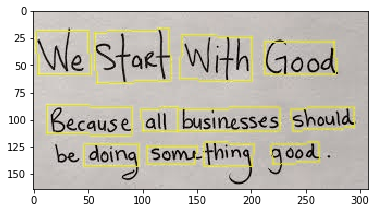

In [11]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread("/content/hr.jpg")
#cv.rectangle(img,(29,2496),(604,2992),(255,0,0),5)
plt.imshow(img)

In [9]:
cd /content/

/content


In [0]:
# object croping using bounding boxes
import cv2
import os
import numpy as np

In [0]:
newFolder = '/content/test'

if not os.path.exists(newFolder):
  os.makedirs(newFolder)

In [14]:
# number of files sub-dir
cd /content/test

/content/test


In [15]:
# number of files in sub-dir
!ls

hr.jpg	hr.txt


In [17]:
for filename in os.listdir('/content/test'):
  # if filename.endswith(('jpeg','jpg','png','tif'))
  
  if filename.endswith(('txt')):
    with open(os.path.join('/content/test/', filename), 'r') as f:
      index = 0
      for line in f:
        img = cv2.imread(os.path.join('/content/test/', 'hr.jpg'))
        coords_list = line.strip().split(',')
        coords = list(map(int, coords_list))

        x1 = coords[0]
        y1 = coords[1]
        x2 = coords[2]
        y2 = coords[3]
        x3 = coords[4]
        y3 = coords[5]
        x4 = coords[6]
        y4 = coords[7]

        top_left_x = min([x1,x2,x3,x4])
        top_left_y = min([y1,y2,y3,y4])
        bot_right_x = max([x1,x2,x3,x4])
        bot_right_y = max([y1,y2,y3,y4])



        print(top_left_x, top_left_y, bot_right_x, bot_right_y)

        img = img[top_left_y:bot_right_y, top_left_x:bot_right_x]


        cv2.imwrite('img_'+str(index)+'.jpg',img)

        index += 1
      f.close()

12 87 90 114
212 28 278 59
133 89 226 111
135 23 201 65
237 88 295 110
56 17 126 67
47 122 96 143
156 121 202 143
3 19 52 59
219 121 263 141
99 89 133 111
104 124 150 140
